In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_dir = 'dataset/dataset/train'
test_dir = 'dataset/dataset/test'

In [3]:
# Train Dataset

#fresh
fresh_apples_train_dir = os.path.join(train_dir, 'freshapples')
fresh_banana_train_dir = os.path.join(train_dir, 'freshbanana')
fresh_oranges_train_dir = os.path.join(train_dir, 'freshoranges')

#rotten
rotten_apples_train_dir = os.path.join(train_dir, 'rottenapples')
rotten_banana_train_dir = os.path.join(train_dir, 'rottenbanana')
rotten_oranges_train_dir = os.path.join(train_dir, 'rottenoranges')

In [4]:
# Test Dataset

#fresh
fresh_apples_test_dir = os.path.join(test_dir, 'freshapples')
fresh_banana_test_dir = os.path.join(test_dir, 'freshbanana')
fresh_oranges_test_dir = os.path.join(test_dir, 'freshoranges')

#rotten
rotten_apples_test_dir = os.path.join(test_dir, 'rottenapples')
rotten_banana_test_dir = os.path.join(test_dir, 'rottenbanana')
rotten_oranges_test_dir = os.path.join(test_dir, 'rottenoranges')

In [5]:
print("No. of train fresh apple image : ", len(os.listdir(fresh_apples_train_dir)))
print("No. of train fresh banana image : ", len(os.listdir(fresh_banana_train_dir)))
print("No. of train fresh orange image : ", len(os.listdir(fresh_oranges_train_dir)))
print("No. of train rotten apple image : ", len(os.listdir(rotten_apples_train_dir)))
print("No. of train rotten banana image : ", len(os.listdir(rotten_banana_train_dir)))
print("No. of train rotten orange image : ", len(os.listdir(rotten_oranges_train_dir)))

No. of train fresh apple image :  1693
No. of train fresh banana image :  1581
No. of train fresh orange image :  1466
No. of train rotten apple image :  2342
No. of train rotten banana image :  2224
No. of train rotten orange image :  1595


In [6]:
print("No.of test fresh apple image : ", len(os.listdir(fresh_apples_test_dir)))
print("No.of test fresh banana image : ", len(os.listdir(fresh_banana_test_dir)))
print("No.of test fresh orange image : ", len(os.listdir(fresh_oranges_test_dir)))
print("No.of test rotten apple image : ", len(os.listdir(rotten_apples_test_dir)))
print("No.of test rotten banana image : ", len(os.listdir(rotten_banana_test_dir)))
print("No.of test rotten orange image : ", len(os.listdir(rotten_oranges_test_dir)))

No.of test fresh apple image :  395
No.of test fresh banana image :  381
No.of test fresh orange image :  388
No.of test rotten apple image :  601
No.of test rotten banana image :  530
No.of test rotten orange image :  403


(338, 354)


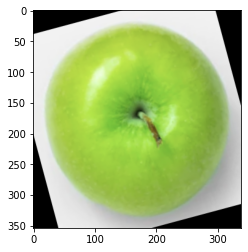

In [10]:
from keras.preprocessing.image import load_img

filename = os.listdir(fresh_apples_train_dir)
sample = random.choice(filename)
image = load_img(os.path.join(fresh_apples_train_dir,sample))
print(image.size)
plt.imshow(image)

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import GlobalAveragePooling2D, AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import Callback, LearningRateScheduler
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from imutils import paths
import argparse
import cv2

In [12]:
train_datagen = ImageDataGenerator(rescale=1/255,
                                   rotation_range=15,
                                   horizontal_flip=True,
                                   fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(
                    'dataset/train',
                    target_size = (150,150),
                    batch_size = 15,
                    class_mode='categorical')

validation_generator = validation_datagen.flow_from_directory(
                    'dataset/test',
                    target_size=(150,150),
                    batch_size= 15,
                    class_mode='categorical'
)

Found 10901 images belonging to 6 classes.
Found 2698 images belonging to 6 classes.


In [14]:
baseModel = VGG16(weights="imagenet",include_top=False, input_tensor=Input(shape=(150,150,3)))

headModel=baseModel.output
headModel = AveragePooling2D(pool_size=(4, 4))(headModel)
headModel = Flatten(name="flatten")(headModel)
headModel = Dense(64, activation="relu")(headModel)
headModel = Dropout(0.5)(headModel)
headModel = Dense(6, activation="softmax")(headModel)

model = Model(inputs=baseModel.input,outputs=headModel)

for layer in baseModel.layers: layer.trainable=False

58892288/58889256 [==============================] - 7s 0us/step


In [15]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 150, 150, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [16]:
model.compile(
    loss='binary_crossentropy',
    optimizer = Adam(lr=1e-3,decay=1e-3/25),
    metrics=["accuracy"]
)

c:\users\harshit\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\optimizer_v2\optimizer_v2.py:374: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  warnings.warn(


In [17]:
history = model.fit(
    train_generator,
    validation_data=validation_generator,
    steps_per_epoch = len(train_generator)//15,
    validation_steps=len(validation_generator)//15,
    epochs=30,
    verbose=1
)

Epoch 1/30
48/48 [==============================] - 90s 2s/step - loss: 0.5392 - accuracy: 0.2414 - val_loss: 0.3628 - val_accuracy: 0.5556
Epoch 2/30
48/48 [==============================] - 86s 2s/step - loss: 0.3885 - accuracy: 0.5025 - val_loss: 0.3211 - val_accuracy: 0.6333
Epoch 3/30
48/48 [==============================] - 90s 2s/step - loss: 0.3524 - accuracy: 0.4918 - val_loss: 0.2902 - val_accuracy: 0.6556
Epoch 4/30
48/48 [==============================] - 94s 2s/step - loss: 0.3227 - accuracy: 0.5539 - val_loss: 0.2651 - val_accuracy: 0.7889
Epoch 5/30
48/48 [==============================] - 95s 2s/step - loss: 0.2962 - accuracy: 0.6320 - val_loss: 0.2364 - val_accuracy: 0.7667
Epoch 6/30
48/48 [==============================] - 88s 2s/step - loss: 0.2920 - accuracy: 0.6199 - val_loss: 0.2346 - val_accuracy: 0.7667
Epoch 7/30
48/48 [==============================] - 86s 2s/step - loss: 0.2732 - accuracy: 0.7055 - val_loss: 0.2262 - val_accuracy: 0.6833
Epoch 8/30
48/48 [==

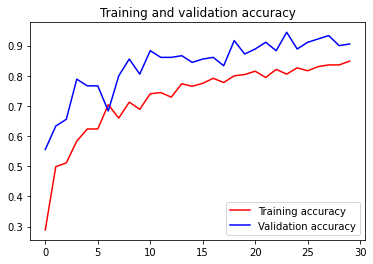

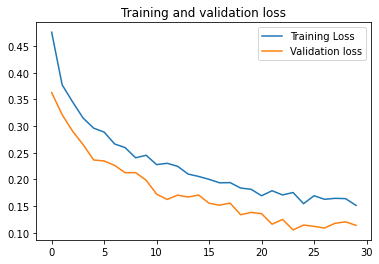

In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs,acc,'r', label='Training accuracy')
plt.plot(epochs,val_acc,'b', label='Validation accuracy')
plt.title ('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.plot(epochs,loss,label='Training Loss')
plt.plot(epochs, val_loss, label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)

In [21]:
result = model.evaluate(validation_generator)
print('Accuracy: ', result[1])

180/180 [==============================] - 231s 1s/step - loss: 0.1084 - accuracy: 0.9144
Accuracy:  0.9143810272216797


dataset/dataset/test\rottenbanana\rotated_by_75_Screen Shot 2018-06-12 at 8.51.46 PM.png
[[0. 0. 0. 0. 1. 0.]]
rotten banana


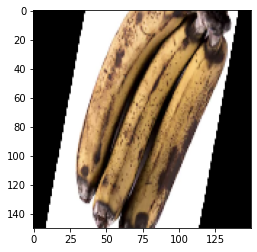

In [22]:
from keras.preprocessing.image import img_to_array

names = [fresh_apples_test_dir,
         fresh_banana_test_dir,
         fresh_oranges_test_dir,
         rotten_apples_test_dir,
         rotten_banana_test_dir,
         rotten_oranges_test_dir
]
name_rand = random.choice(names)


filename = os.listdir(name_rand)
sample = random.choice(filename)
fn = os.path.join(name_rand,sample)
print(fn)


img = load_img(fn, target_size=(150, 150))
plt.imshow(img)


x = img_to_array(img)
x = np.expand_dims(x, axis=0)
images = np.vstack([x])
classes = model.predict(images, batch_size=10)
print(classes)


prediction = ''

if classes[0][0]==1:
    prediction = 'fresh apple'
elif classes[0][1]==1:
    prediction = 'fresh banana'
elif classes[0][2]==1:
    prediction = 'fresh orange'
elif classes[0][3]==1:
    prediction = 'rotten apple'
elif classes[0][4]==1:
    prediction = 'rotten banana'
elif classes[0][5]==1:
    prediction = 'rotten orange'

print(prediction)